In [19]:
import pandas as pd
from atwater_functions import load_data, merge_data, plot_with_dividers
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.patches as mpatches


In [20]:
import requests


url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=LFBR2MU1P6JOUADD'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-12-13 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-12-13 19:55:00': {'1. open': '230.5000', '2. high': '230.5000', '3. low': '230.5000', '4. close': '230.5000', '5. volume': '35'}, '2024-12-13 19:50:00': {'1. open': '230.7999', '2. high': '230.7999', '3. low': '230.7999', '4. close': '230.7999', '5. volume': '15'}, '2024-12-13 19:45:00': {'1. open': '230.5000', '2. high': '230.5000', '3. low': '230.5000', '4. close': '230.5000', '5. volume': '40'}, '2024-12-13 19:40:00': {'1. open': '230.5000', '2. high': '230.5000', '3. low': '230.5000', '4. close': '230.5000', '5. volume': '8'}, '2024-12-13 19:35:00': {'1. open': '230.8000', '2. high': '230.8000', '3. low': '230.6000', '4. close': '230.6000', '5. volume': '40'}, '2024-12-13 19:25:00': {'1. open': '230.5700', '2. high': 

In [21]:
import requests
import pandas as pd
from datetime import datetime

#3052842814
#3052846565
API_KEY = 'LFBR2MU1P6JOUADD'  

def get_crypto_data(symbol='BTC', market='USD'):
    """
    Get cryptocurrency data from Alpha Vantage
    symbol: str, cryptocurrency symbol (e.g., 'BTC', 'ETH', 'DOGE')
    market: str, market to compare against (e.g., 'USD', 'EUR')
    """
    
    base_url = 'https://www.alphavantage.co/query'
    
   
    params = {
        'function': 'DIGITAL_CURRENCY_DAILY',
        'symbol': symbol,
        'market': market,
        'apikey': API_KEY
    }
    
    try:
        # Make the request
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Check for error messages
        if "Error Message" in data:
            print(f"Error: {data['Error Message']}")
            return None
            
        # Convert to DataFrame
        df = pd.DataFrame.from_dict(data['Time Series (Digital Currency Daily)'], 
                                  orient='index')
        
        # Clean column names
        df.columns = [col.split('. ')[1] for col in df.columns]
        
        # Convert to numeric
        for column in df.columns:
            df[column] = pd.to_numeric(df[column])
            
        # Convert index to datetime
        df.index = pd.to_datetime(df.index)
        
        # Sort by date
        df = df.sort_index()
        
        return df
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Bitcoin data
btc_data = get_crypto_data('BTC', 'USD')

if btc_data is not None:
    print("\nBitcoin Data Shape:", btc_data.shape)
    print("\nColumns:", btc_data.columns.tolist())
    print("\nMost recent data:")
    print(btc_data.tail())


Bitcoin Data Shape: (350, 5)

Columns: ['open', 'high', 'low', 'close', 'volume']

Most recent data:
                 open       high        low      close        volume
2024-12-12  101211.61  102595.00   99298.39  100030.47  14796.924565
2024-12-13  100024.75  101959.13   99220.81  101428.75  13327.599541
2024-12-14  101428.74  102650.00  100600.00  101399.99   4181.401803
2024-12-15  101400.00  105100.00  101221.34  104447.76   7796.333581
2024-12-16  104445.15  106554.39  104293.75  105042.84   2072.685257


In [22]:
finance_file_path = 'raw_data/Financial Select Sector SPDR Fund.csv'

In [23]:
import os


print(os.getcwd())


print(os.listdir('raw_data'))  # or whatever directory you think contains the file

/Users/leonardo.galebe/project_1_repo
['Utilities Select Sector SPDR Fund.csv', 'political_control_final.csv', 'Financial Select Sector SPDR Fund.csv', 'Technology Select Sector SPDR Fund.csv', 'Health Care Select Sector SPDR Fund.csv', 'Consumer Staples Select Sector SPDR Fund.csv', 'political_control_2014_2024.csv', 'Energy Select Sector SPDR Fund.csv']


In [24]:
stock_only = pd.read_csv(finance_file_path)
stock_only.head


<bound method NDFrame.head of       Unnamed: 0  1. open  2. high  3. low  4. close  5. adjusted close  \
0     2024-12-09    50.44  50.4900  49.690     49.71            49.7100   
1     2024-12-06    51.42  51.4893  50.085     50.40            50.4000   
2     2024-11-29    51.01  51.6200  50.760     51.34            51.3400   
3     2024-11-22    49.91  50.7800  49.295     50.73            50.7300   
4     2024-11-15    49.68  50.1350  49.545     49.87            49.8700   
...          ...      ...      ...     ...       ...                ...   
1305  1999-12-10    24.81  24.8100  23.610     24.41            12.0398   
1306  1999-12-03    24.28  25.4100  24.030     24.94            12.3012   
1307  1999-11-26    25.50  25.5000  24.630     24.63            12.1483   
1308  1999-11-19    25.88  26.7800  25.560     25.59            12.6218   
1309  1999-11-12    25.97  26.0000  24.640     25.94            12.7944   

      6. volume  7. dividend amount  
0      41063495                

In [25]:
# Clean the financial data
stock_data = stock_only


stock_data.columns = stock_data.columns.str.replace(r'\d+\.\s*', '').str.lower().str.strip()

# Convert date column to datetime
stock_data['date'] = pd.to_datetime(stock_data['unnamed: 0'])
stock_data = stock_data.drop('unnamed: 0', axis=1)  # Remove the original date column

# Set date as index and sort
stock_data = stock_data.set_index('date').sort_index()

# Remove any duplicate indices
stock_data = stock_data.loc[~stock_data.index.duplicated(keep='first')]

# Clean up 
stock_data.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount']

# See what we working with 
print("\nDataset Shape:", stock_data.shape)
print("\nColumns:", stock_data.columns.tolist())
print("\nSample of cleaned data:")
print(stock_data.head())
print("\nDataset Info:")
stock_data.info()


Dataset Shape: (1310, 7)

Columns: ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount']

Sample of cleaned data:
             open   high    low  close  adjusted_close   volume  \
date                                                              
1999-11-12  25.97  26.00  24.64  25.94         12.7944  1479800   
1999-11-19  25.88  26.78  25.56  25.59         12.6218  1359100   
1999-11-26  25.50  25.50  24.63  24.63         12.1483   525800   
1999-12-03  24.28  25.41  24.03  24.94         12.3012  2702900   
1999-12-10  24.81  24.81  23.61  24.41         12.0398  2575200   

            dividend_amount  
date                         
1999-11-12              0.0  
1999-11-19              0.0  
1999-11-26              0.0  
1999-12-03              0.0  
1999-12-10              0.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1310 entries, 1999-11-12 to 2024-12-09
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dt

In [26]:
stock_data.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-11-12,25.97,26.00,24.64,25.94,12.7944,1479800,0.0
1999-11-19,25.88,26.78,25.56,25.59,12.6218,1359100,0.0
1999-11-26,25.50,25.50,24.63,24.63,12.1483,525800,0.0
1999-12-03,24.28,25.41,24.03,24.94,12.3012,2702900,0.0
1999-12-10,24.81,24.81,23.61,24.41,12.0398,2575200,0.0


In [27]:
stock_data.tail()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
2024-11-15,49.68,50.1350,49.545,49.87,49.87,233041993,0.0
2024-11-22,49.91,50.7800,49.295,50.73,50.73,181026615,0.0
2024-11-29,51.01,51.6200,50.760,51.34,51.34,122892643,0.0
2024-12-06,51.42,51.4893,50.085,50.40,50.40,200463927,0.0
2024-12-09,50.44,50.4900,49.690,49.71,49.71,41063495,0.0


In [28]:
btc_data.head()

,open,high,low,close,volume
2024-01-02,44220.78,45925.82,44195.13,44972.80,29583.384077
2024-01-03,44972.81,45519.32,40625.68,42862.44,32281.852344
2024-01-04,42860.58,44800.00,42650.00,44193.29,18193.816844
2024-01-05,44198.35,44443.37,42450.00,44186.59,18073.095615
2024-01-06,44187.76,44260.95,43436.50,43992.44,5691.434603


In [29]:
# Check the date ranges and frequency 
print("Stock data:")
print("Date range:", stock_data.index.min(), "to", stock_data.index.max())
print("Frequency:", stock_data.index.freq)
print("\nBitcoin data:")
print("Date range:", btc_data.index.min(), "to", btc_data.index.max())
print("Frequency:", btc_data.index.freq)

start_date = max(stock_data.index.min(), btc_data.index.min())
end_date = min(stock_data.index.max(), btc_data.index.max())

# Getting datasets to the same date range
stock_data_trimmed = stock_data.loc[start_date:end_date]
btc_data_trimmed = btc_data.loc[start_date:end_date]


stock_cols = ['close', 'volume']  
btc_cols = ['close', 'volume']    

stock_data_final = stock_data_trimmed[stock_cols]
btc_data_final = btc_data_trimmed[btc_cols]

# Renaming columns
stock_data_final = stock_data_final.add_prefix('stock_')
btc_data_final = btc_data_final.add_prefix('btc_')

# Merge 
merged_data = pd.merge(
    stock_data_final,
    btc_data_final,
    left_index=True,
    right_index=True,
    how='inner'
)

# Check 
print("\nMerged Dataset Info:")
print("Shape:", merged_data.shape)
print("\nColumns:", merged_data.columns.tolist())
print("\nSample of merged data:")
print(merged_data.head())
print("\nMissing values:")
print(merged_data.isnull().sum())



Stock data:
Date range: 1999-11-12 00:00:00 to 2024-12-09 00:00:00
Frequency: None

Bitcoin data:
Date range: 2024-01-02 00:00:00 to 2024-12-16 00:00:00
Frequency: None

Merged Dataset Info:
Shape: (50, 4)

Columns: ['stock_close', 'stock_volume', 'btc_close', 'btc_volume']

Sample of merged data:
            stock_close  stock_volume  btc_close    btc_volume
2024-01-05        37.75     159935426   44186.59  18073.095615
2024-01-12        37.60     202909146   42773.03  46862.433472
2024-01-19        37.93     184240630   41624.07  22745.552712
2024-01-26        38.65     231268516   41814.80  19359.379211
2024-02-02        38.98     278409760   43181.66  12202.241259

Missing values:
stock_close     0
stock_volume    0
btc_close       0
btc_volume      0
dtype: int64


In [30]:
# Verifing merged dataset
print("Merged Dataset Overview:")
print("Total rows:", len(merged_data))
print("Date range:", merged_data.index.min(), "to", merged_data.index.max())
print("\nColumns:", merged_data.columns.tolist())

print("\nBasic Statistics:")
print(merged_data.describe())

print("\nNumber of missing values per column:")
print(merged_data.isnull().sum())

Merged Dataset Overview:
Total rows: 50
Date range: 2024-01-05 00:00:00 to 2024-12-09 00:00:00

Columns: ['stock_close', 'stock_volume', 'btc_close', 'btc_volume']

Basic Statistics:
       stock_close  stock_volume     btc_close    btc_volume
count    50.000000  5.000000e+01     50.000000     50.000000
mean     43.063200  1.937292e+08  64701.786000  16743.031887
std       3.590966  5.539395e+07  13599.430015   7976.251986
min      37.600000  4.106350e+07  41624.070000   7884.218318
25%      40.627500  1.608324e+08  59412.915000  11513.386912
50%      41.945000  1.849176e+08  63831.465000  14824.274996
75%      45.525000  2.264907e+08  68197.890000  19143.397069
max      51.340000  3.613886e+08  99891.350000  46862.433472

Number of missing values per column:
stock_close     0
stock_volume    0
btc_close       0
btc_volume      0
dtype: int64


In [31]:
merged_data.head()

,stock_close,stock_volume,btc_close,btc_volume
2024-01-05,37.75,159935426,44186.59,18073.095615
2024-01-12,37.60,202909146,42773.03,46862.433472
2024-01-19,37.93,184240630,41624.07,22745.552712
2024-01-26,38.65,231268516,41814.80,19359.379211
2024-02-02,38.98,278409760,43181.66,12202.241259


Bitcoin data starts from: 2024-01-02 00:00:00


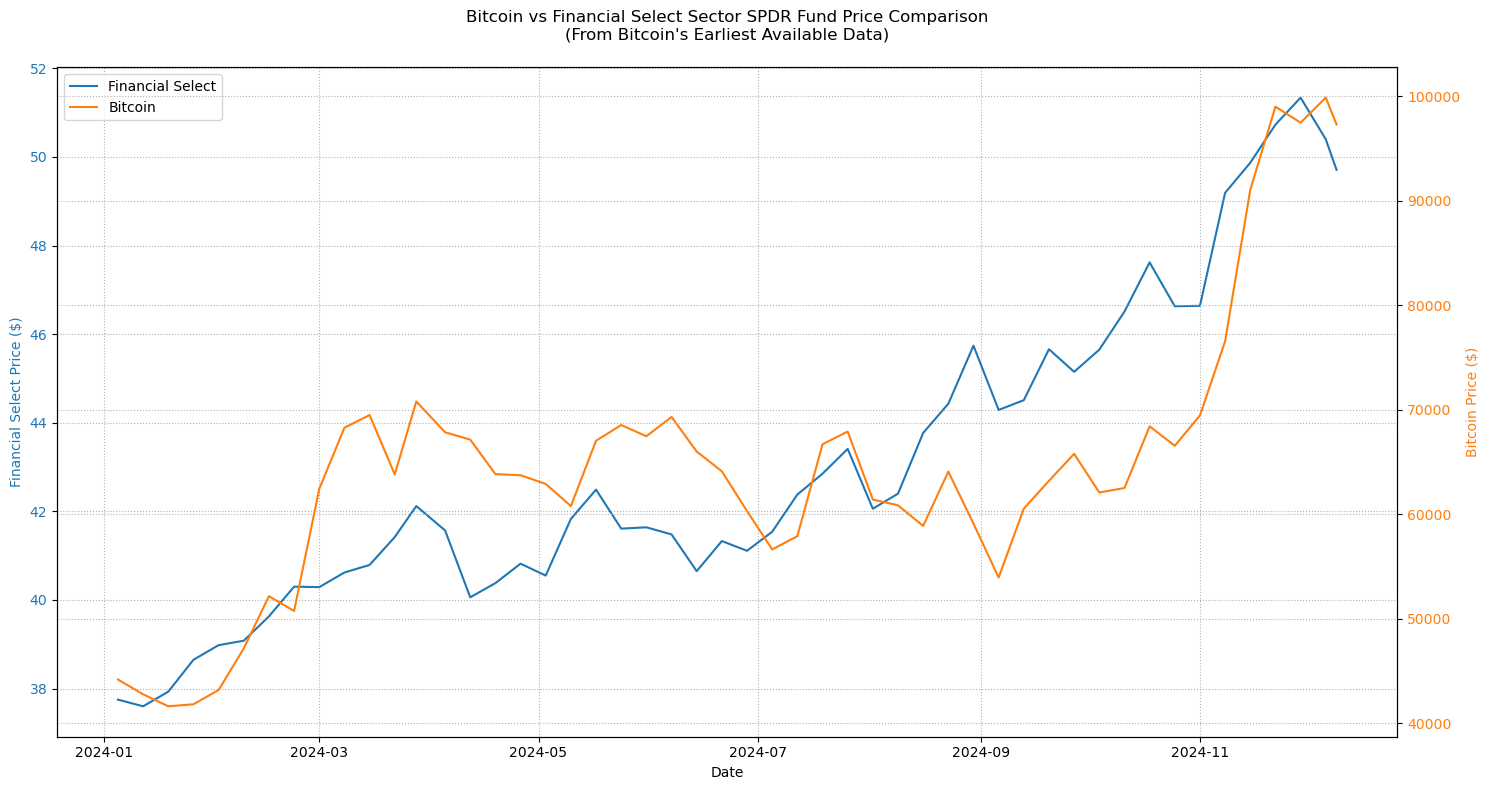

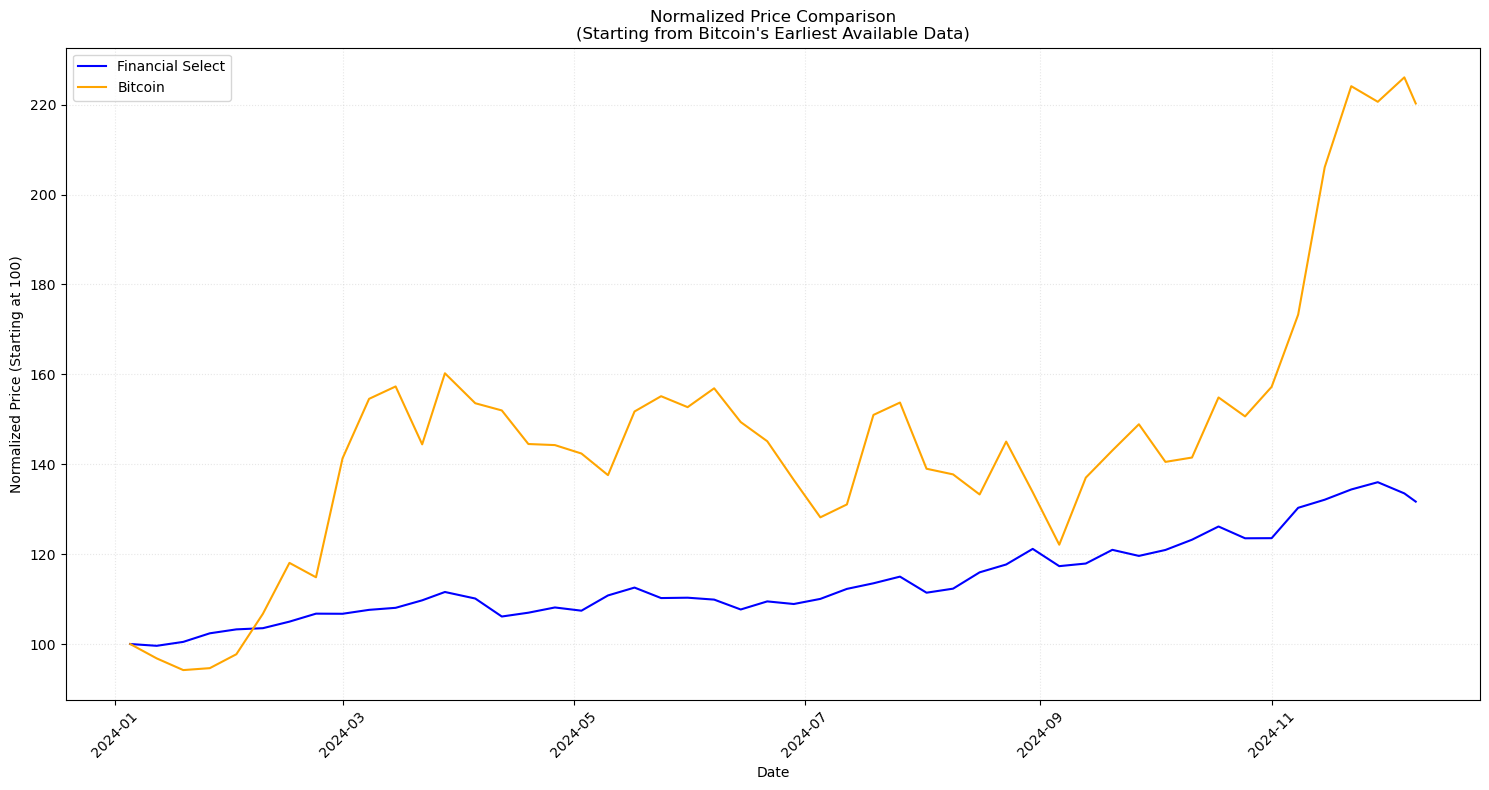

In [32]:

import matplotlib.pyplot as plt

# Bitcoin's start date
btc_start_date = btc_data.index.min()
print(f"Bitcoin data starts from: {btc_start_date}")

# Filter both datasets to start from Bitcoin's start date
merged_data_full = merged_data[btc_start_date:]

# Create figure
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Financial Select Price ($)', color=color)
line1 = ax1.plot(merged_data_full.index, merged_data_full['stock_close'], color=color, label='Financial Select')
ax1.tick_params(axis='y', labelcolor=color)

# second y-axis 
ax2 = ax1.twinx()

# Plot Bitcoin 
color = 'tab:orange'
ax2.set_ylabel('Bitcoin Price ($)', color=color)
line2 = ax2.plot(merged_data_full.index, merged_data_full['btc_close'], color=color, label='Bitcoin')
ax2.tick_params(axis='y', labelcolor=color)

# Labeling
plt.title('Bitcoin vs Financial Select Sector SPDR Fund Price Comparison\n(From Bitcoin\'s Earliest Available Data)', pad=20)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis 
plt.xticks(rotation=45)

# Adjust layout 
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))

stock_norm = merged_data_full['stock_close'] / merged_data_full['stock_close'].iloc[0] * 100
btc_norm = merged_data_full['btc_close'] / merged_data_full['btc_close'].iloc[0] * 100

# Plot both normalized sets
ax.plot(merged_data_full.index, stock_norm, label='Financial Select', color='blue')
ax.plot(merged_data_full.index, btc_norm, label='Bitcoin', color='orange')

ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price (Starting at 100)')
ax.set_title('Normalized Price Comparison\n(Starting from Bitcoin\'s Earliest Available Data)')
ax.legend()

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##Just for first impression of what the data looks like visually

/var/folders/_2/0tp5kryn7ddcz69938ds6z31883_rp/T/ipykernel_6580/1939925319.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


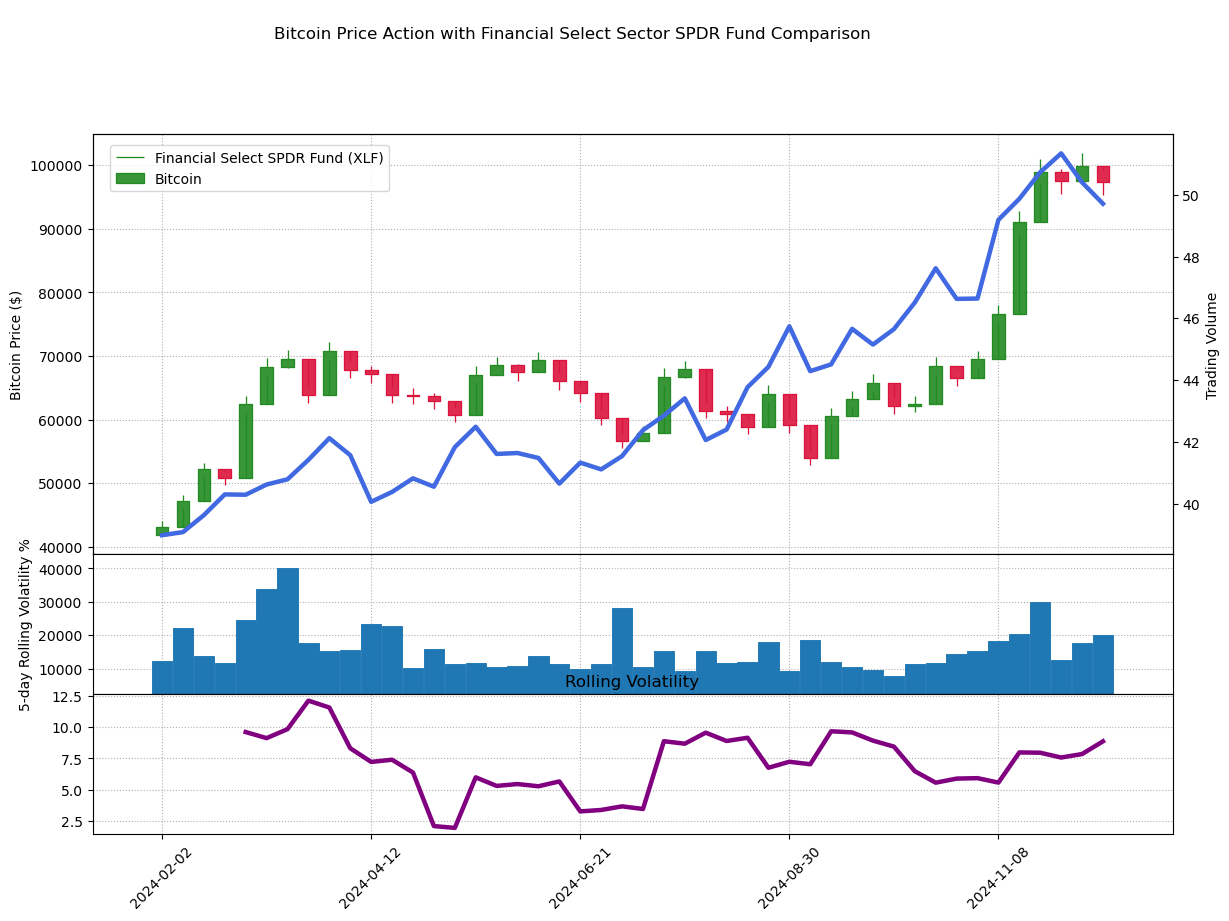

In [36]:
import mplfinance as mpf
import numpy as np

# Calculated Bitcoin's daily volatility
btc_data_full = merged_data_full.copy()
btc_data_full['btc_volatility'] = merged_data_full['btc_close'].pct_change().rolling(window=5).std() * 100

# Create OHLC data for Bitcoin
bitcoin_ohlc = pd.DataFrame({
    'Open': btc_data_full['btc_close'].shift(1),
    'High': btc_data_full['btc_close'] * 1.02, 
    'Low': btc_data_full['btc_close'] * 0.98,
    'Close': btc_data_full['btc_close'],
    'Volume': btc_data_full['btc_volume']
})

bitcoin_ohlc = bitcoin_ohlc.dropna()

# Make sure other data matches the OHLC data
btc_data_full = btc_data_full.loc[bitcoin_ohlc.index]
merged_data_full = merged_data_full.loc[bitcoin_ohlc.index]

mc = mpf.make_marketcolors(
    up='forestgreen',
    down='crimson',
    edge='inherit',
    wick='inherit',
    volume='tab:blue',  # Set volume color here instead
    ohlc='inherit'
)

s = mpf.make_mpf_style(
    marketcolors=mc,
    gridstyle='dotted',
    y_on_right=False,
    figcolor='white'
)

fig, axes = mpf.plot(
    bitcoin_ohlc,
    type='candle',
    style=s,
    volume=True,
    figsize=(15, 10),
    panel_ratios=(6,2,2),
    returnfig=True,
    title='\nBitcoin Price Action with Financial Select Sector SPDR Fund Comparison\n',
    datetime_format='%Y-%m-%d',
    xrotation=45,
    addplot=[
        mpf.make_addplot(btc_data_full['btc_volatility'], panel=2, color='purple', 
                        title='Rolling Volatility'),
        mpf.make_addplot(merged_data_full['stock_close'], panel=0, color='royalblue', 
                        secondary_y=True, ylabel='Financial Select Price ($)')
    ]
)

axes[0].set_ylabel('Bitcoin Price ($)')
axes[2].set_ylabel('5-day Rolling Volatility %')
axes[1].set_ylabel('Trading Volume')

axes[0].legend(['Financial Select SPDR Fund (XLF)', 'Bitcoin'], 
              loc='upper left', 
              bbox_to_anchor=(0.01, 0.99))

plt.tight_layout()
plt.show()

#MLPFINANCE was just for experimental purpose. first time messing with it.

^^simple volatilty candle plot 

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate volatility for SPDR Fund
merged_data_full['stock_volatility'] = merged_data_full['stock_close'].pct_change().rolling(window=5).std() * 100

# Create the figure with secondary y-axis for all subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    subplot_titles=('Price Comparison', 'Trading Volume', 'Volatility'),
    row_heights=[0.6, 0.2, 0.2],
    specs=[[{"secondary_y": True}],
           [{"secondary_y": True}],
           [{"secondary_y": True}]]
)

# Add Bitcoin price line
fig.add_trace(
    go.Scatter(
        x=bitcoin_ohlc.index,
        y=bitcoin_ohlc['Close'],
        name='Bitcoin Price',
        line=dict(color='orange', width=2),
        mode='lines'
    ),
    row=1, col=1,
    secondary_y=False
)

# Add Financial Select price line
fig.add_trace(
    go.Scatter(
        x=merged_data_full.index,
        y=merged_data_full['stock_close'],
        name='SPDR Fund Price',
        line=dict(color='royalblue', width=2),
        mode='lines'
    ),
    row=1, col=1,
    secondary_y=True
)

# Add Bitcoin volume line
fig.add_trace(
    go.Scatter(
        x=bitcoin_ohlc.index,
        y=bitcoin_ohlc['Volume'],
        name='Bitcoin Volume',
        line=dict(color='orange', width=1, dash='dot'),
        mode='lines'
    ),
    row=2, col=1,
    secondary_y=False
)

if 'stock_volume' in merged_data_full.columns:
    fig.add_trace(
        go.Scatter(
            x=merged_data_full.index,
            y=merged_data_full['stock_volume'],
            name='SPDR Volume',
            line=dict(color='royalblue', width=1, dash='dot'),
            mode='lines'
        ),
        row=2, col=1,
        secondary_y=True
    )

# Add Bitcoin volatility line
fig.add_trace(
    go.Scatter(
        x=btc_data_full.index,
        y=btc_data_full['btc_volatility'],
        name='Bitcoin Volatility',
        line=dict(color='orange', width=1),
        mode='lines'
    ),
    row=3, col=1,
    secondary_y=False
)

# Add Financial Select volatility line
fig.add_trace(
    go.Scatter(
        x=merged_data_full.index,
        y=merged_data_full['stock_volatility'],
        name='SPDR Volatility',
        line=dict(color='royalblue', width=1),
        mode='lines'
    ),
    row=3, col=1,
    secondary_y=True
)

fig.update_layout(
    title='Bitcoin and Financial Select SPDR Fund Comparison',
    height=1000,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    hovermode='x unified',
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_yaxes(title_text="Bitcoin Price ($)", row=1, col=1, secondary_y=False, gridcolor='lightgrey')
fig.update_yaxes(title_text="SPDR Price ($)", row=1, col=1, secondary_y=True, gridcolor='lightgrey')

fig.update_yaxes(title_text="Bitcoin Volume", row=2, col=1, secondary_y=False, gridcolor='lightgrey')
fig.update_yaxes(title_text="SPDR Volume", row=2, col=1, secondary_y=True, gridcolor='lightgrey')

fig.update_yaxes(title_text="Bitcoin Volatility (%)", row=3, col=1, secondary_y=False, gridcolor='lightgrey')
fig.update_yaxes(title_text="SPDR Volatility (%)", row=3, col=1, secondary_y=True, gridcolor='lightgrey')

fig.update_xaxes(
    rangeslider_visible=False,
    tickformat="%Y-%m",
    tickmode='auto',
    nticks=20,
    tickangle=45,
    gridcolor='lightgrey'
)

for trace in fig.data:
    if 'Price' in trace.name:
        trace.hovertemplate = "%{x|%Y-%m-%d}<br>%{y:$.2f}<extra>" + trace.name + "</extra>"
    elif 'Volume' in trace.name:
        trace.hovertemplate = "%{x|%Y-%m-%d}<br>%{y:,.0f}<extra>" + trace.name + "</extra>"
    elif 'Volatility' in trace.name:
        trace.hovertemplate = "%{x|%Y-%m-%d}<br>%{y:.2f}%<extra>" + trace.name + "</extra>"

fig.show()